In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import scipy.integrate as integrate

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot or uproo4
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to functions for taking discrete derivatives of lists of data
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Derivatives.ipynb

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

In [3]:
#date="05-07-2024"
#dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+date
#dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+date+"/cc"
dir="/Users/cmc/analysis_phd/root_files/local_runs/e16/target"
root_file=dir+"/analysis_full_e16_geo_fid.root"
#root_file=dir+"/exp_e16_clas6_fid_geo_"+date+".root"
file=uproot3.open(root_file)

species="ele"
detector="ec"
cut="pid"

sector_names = ["sec1","sec2","sec3","sec4","sec5","sec6","all"]
side = ["left","coinc","right","All"]
num_cc_seg = 18
num_cc_side = 3
num_sc_pad = 48
#0-> pid | 1->event selection all 

In [4]:
layer1="Geometric Distributions"
layer2="Geo Fid "+species
layer3=layer2+" "+detector
layer4=[layer3+" "+sector_names[sec] for sec in range(7)]
layer5=[layer4[sec]+" "+cut for sec in range(7)]

    

In [5]:
hist_idx_len = len(file[layer1+"/"+layer2+"/"+layer3+"/"+layer4[0]+"/"+layer5[0]].keys())

hist = [[file[layer1+"/"+layer2+"/"+layer3+"/"+layer4[sec]+"/"+layer5[sec]][file[layer1+"/"+layer2+"/"+layer3+"/"+layer4[sec]+"/"+layer5[sec]].keys()[2*hist_idx]] for hist_idx in range(round(hist_idx_len/2))] for sec in range(7)]


cut_hist_len = round(hist_idx_len/4)

In [6]:
def x_idx(xarray_, xval_):
    for i in range(len(xarray_)):
        if xarray_[i] <= xval_:
            if xarray_[i+1] >= xval_:
                return i
    return -1

def y_idx(yarray_, yval_):
    for i in range(len(yarray_)):
        if yarray_[i] <= yval_:
            if yarray_[i+1] >= yval_:
                return i
    return -1

In [7]:
#For cut only
def side_idx(hist_idx_):
    if hist_idx_ < num_cc_seg*3:
        if hist_idx_ < num_cc_seg:
            return 0
        elif hist_idx < num_cc_seg*2:
            return 1
        else:
            return 2
    elif hist_idx_ <= num_cc_seg*3+3:
        return hist_idx_ - (num_cc_seg*3)

def seg_idx(hist_idx_):
    if hist_idx_ < num_cc_seg*3:
        if hist_idx_ < num_cc_seg:
            return hist_idx_
        elif hist_idx < num_cc_seg*2:
            return hist_idx_ - num_cc_seg
        else:
            return hist_idx_ - num_cc_seg*2
    elif hist_idx_ <= num_cc_seg*3+3:
        return _num_cc_seg
    
def pad_idx(hist_idx_):
    if hist_idx_ <= _num_sc_pad:
        return hist_idx_ 
    else:
        return -1
    
def cc_hist_idx(side_, seg_):
    if side_ == 3:
        if seg_ == num_cc_seg:
            return cut_hist_len-1
        else:
            return -1
    else:
        if seg_ == num_cc_seg:
            return num_cc_seg*3 + side_
        else:
            return num_cc_seg*side_ + seg_


In [8]:
#Look at Overall Distributions
xdim_len = len(Center_Xbins(hist[0][0]))
ydim_len = len(Center_Ybins(hist[0][0]))

x_merge = 1
y_merge = 1


xvals = Merge_Bins(Center_Xbins(hist[0][0]),x_merge)
yvals = Merge_Bins(Center_Ybins(hist[0][0]),y_merge)
zvals_xy = [[Merge_Z(XY_Values(hist[sec][hist_idx]),x_merge,y_merge) for hist_idx in range(cut_hist_len)] for sec in range(7)]
zvals_yx = [[Merge_Z(YX_Values(hist[sec][hist_idx]),y_merge,x_merge) for hist_idx in range(cut_hist_len)] for sec in range(7)]



In [9]:
xdim = len(xvals)
ydim = len(yvals)

xres = xvals[1]-xvals[0]
yres = yvals[1]-yvals[0]

def shift_idx(x_shift_):
    return round(x_shift_/xres)

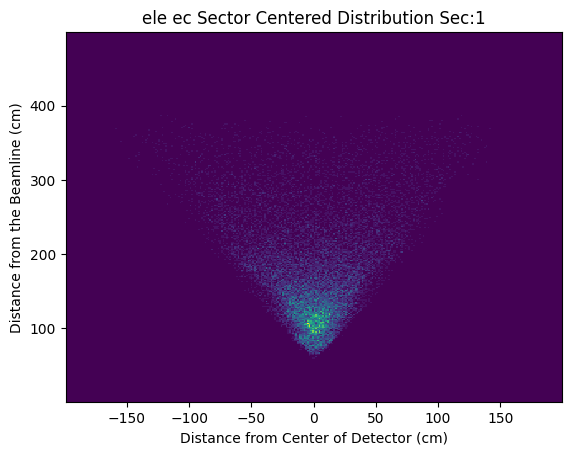

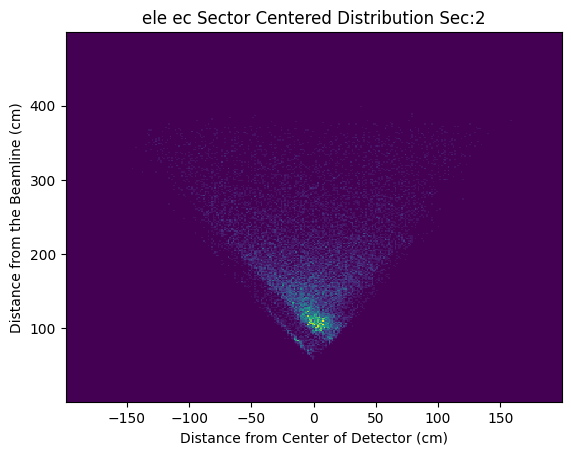

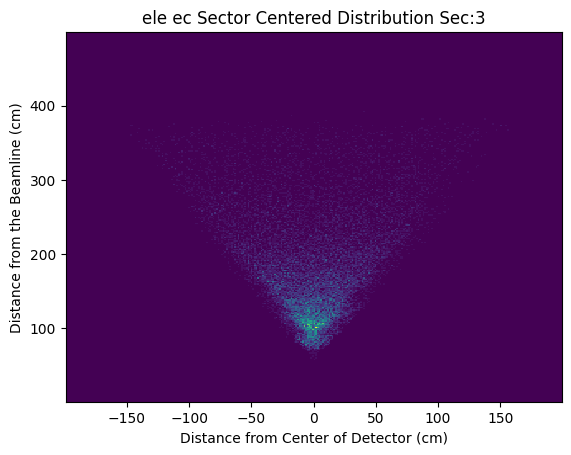

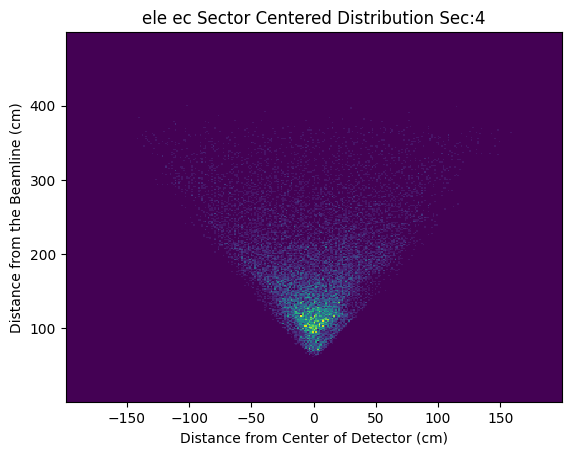

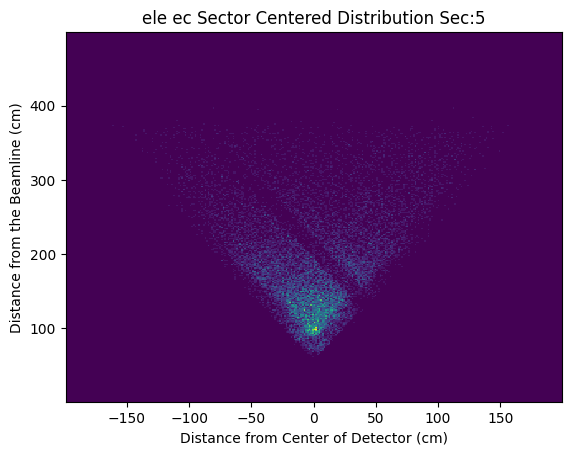

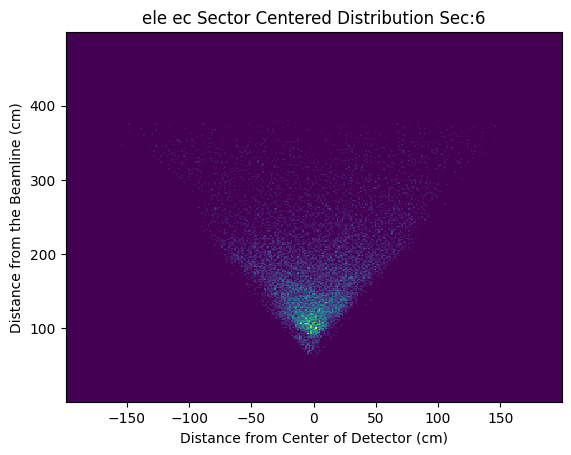

In [10]:
dumb1_x= np.zeros((7,cut_hist_len,xdim*ydim))
dumb1_y= np.zeros((7,cut_hist_len,xdim*ydim))
dense1 = np.zeros((7,cut_hist_len,xdim*ydim))
dumb2_x= np.zeros((7,cut_hist_len,xdim*ydim))
dumb2_y= np.zeros((7,cut_hist_len,xdim*ydim))
dense2 = np.zeros((7,cut_hist_len,xdim*ydim))
for sec in range(7):
    for i in range(xdim):
        for j in range(ydim):
            for hist_idx in range(cut_hist_len):
                dumb1_x[sec][hist_idx][i+j*xdim]+=xvals[i]
                dumb1_y[sec][hist_idx][i+j*xdim]+=yvals[j]
                dense1[sec][hist_idx][i+j*xdim]+=zvals_xy[sec][hist_idx][i][j]
                dumb2_x[sec][hist_idx][j+i*ydim]+=yvals[j]
                dumb2_y[sec][hist_idx][j+i*ydim]+=xvals[i]
                dense2[sec][hist_idx][j+i*ydim]+=zvals_yx[sec][hist_idx][j][i]
for sec in range(6):
    plt.hist2d(dumb1_x[sec][cut_hist_len-1], dumb1_y[sec][cut_hist_len-1], bins=(xdim, ydim), weights=dense1[sec][cut_hist_len-1])
    plt.title(species+" "+detector+" Sector Centered Distribution Sec:{}".format(sec+1))
    plt.xlabel("Distance from Center of Detector (cm)")
    plt.ylabel("Distance from the Beamline (cm)")
    plt.show()

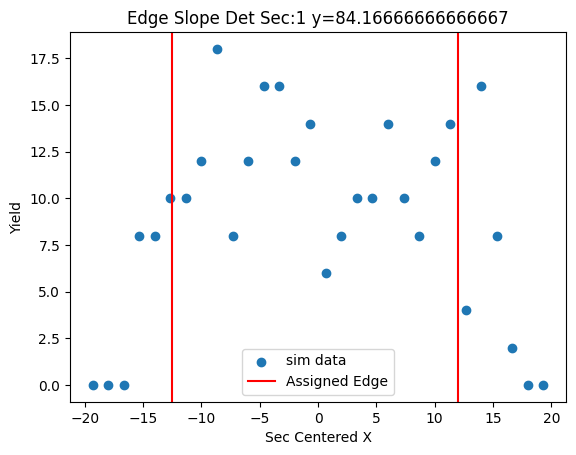

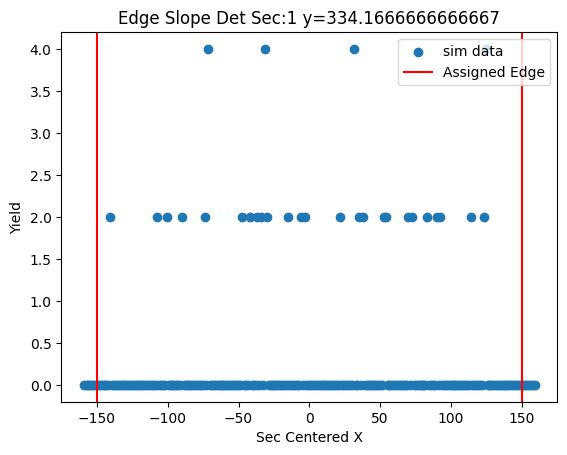

Right Slope =  1.8115942028985508
Left Slope =  -1.8181818181818181


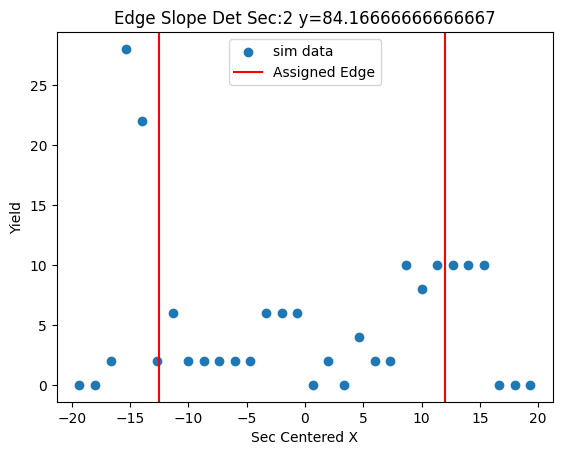

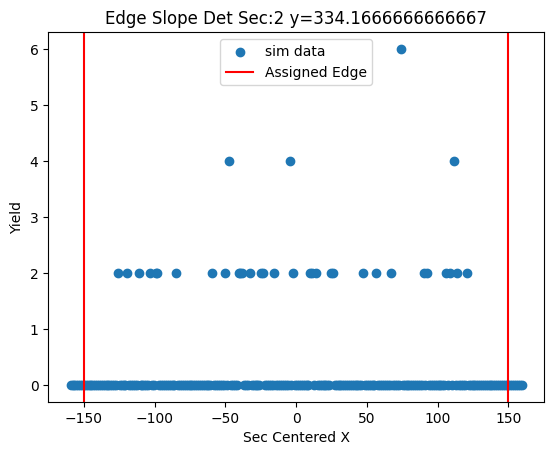

Right Slope =  1.8115942028985508
Left Slope =  -1.8181818181818181


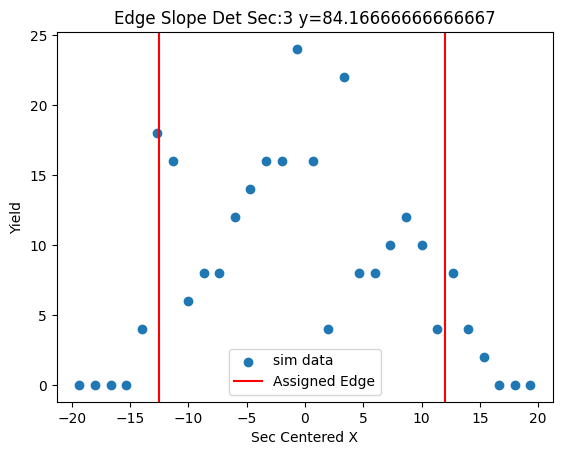

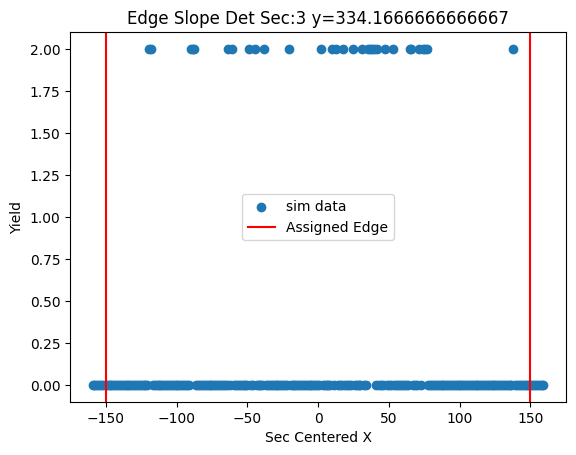

Right Slope =  1.8115942028985508
Left Slope =  -1.8181818181818181


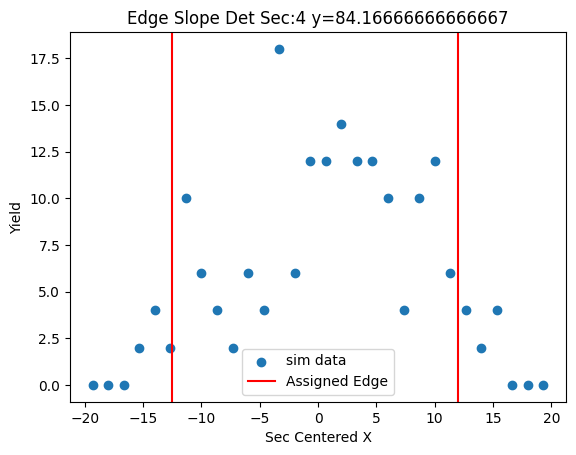

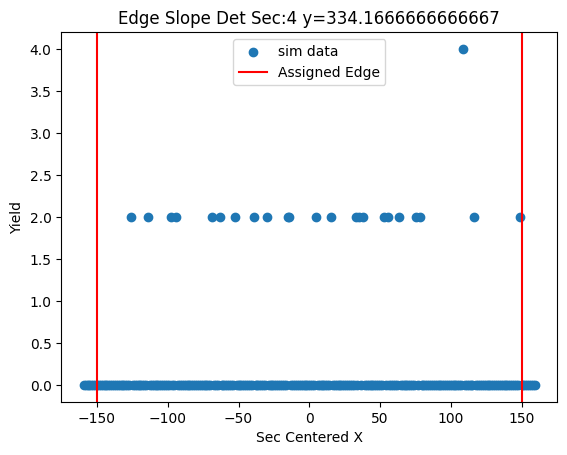

Right Slope =  1.8115942028985508
Left Slope =  -1.8181818181818181


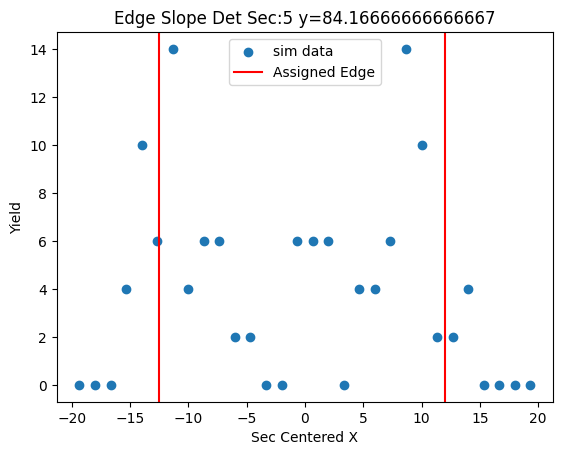

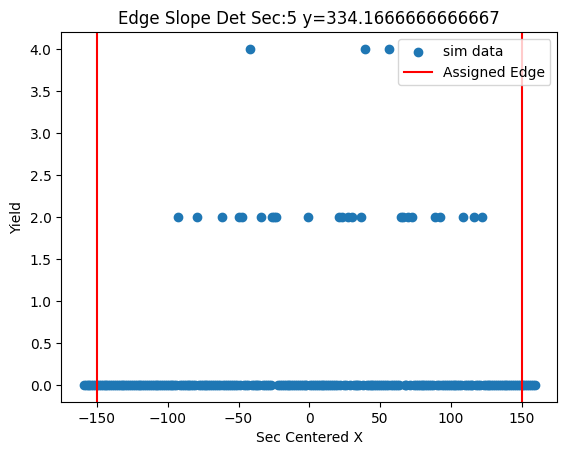

Right Slope =  1.8115942028985508
Left Slope =  -1.8181818181818181


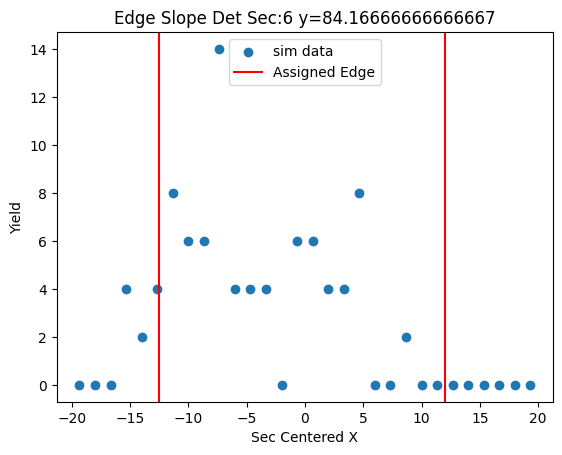

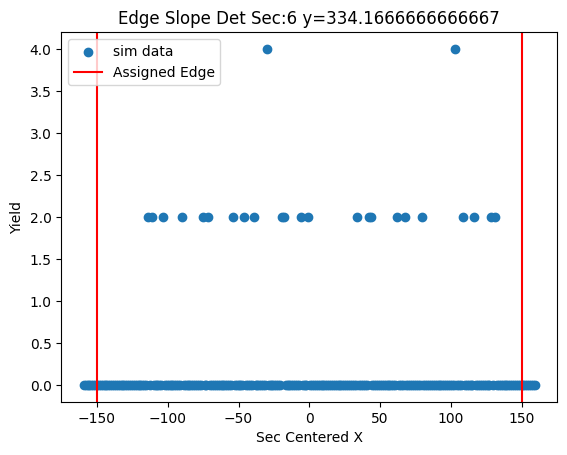

Right Slope =  1.8115942028985508
Left Slope =  -1.8181818181818181


In [11]:
yidx = [50,200]

xrange = [[[-20,20],[-160,160]],
          [[-20,20],[-160,160]],
          [[-20,20],[-160,160]],
          [[-20,20],[-160,160]],
          [[-20,20],[-160,160]],
          [[-20,20],[-160,160]]]

x_points = [[[-12.5,12],[-150,150]],
            [[-12.5,12],[-150,150]],
            [[-12.5,12],[-150,150]],
            [[-12.5,12],[-150,150]],
            [[-12.5,12],[-150,150]],
            [[-12.5,12],[-150,150]]]

right_rot = [3**(1/2),3**(1/2),3**(1/2),3**(1/2),3**(1/2),3**(1/2),3**(1/2)]
left_rot = [3**(1/2),3**(1/2),3**(1/2),3**(1/2),3**(1/2),3**(1/2),3**(1/2)]


for sec in range(6):
    for b in range(2):
        mod_xvals = Bounds_on_Y(xvals,xrange[sec][b][0],xrange[sec][b][1])
        mod_zvals = Bounds_on_X_From_Y(zvals_yx[sec][0][yidx[b]],xvals,xrange[sec][b][0],xrange[sec][b][1])
        plt.scatter(mod_xvals,mod_zvals,label="sim data")
        plt.axvline(x=x_points[sec][b][0],color='r',label="Assigned Edge")
        plt.axvline(x=x_points[sec][b][1],color='r')
        plt.title("Edge Slope Det Sec:{} y={}".format(sec+1,yvals[yidx[b]]))
        plt.xlabel("Sec Centered X")
        plt.ylabel("Yield")
        plt.legend()
        plt.show()
    right_rot[sec] =  (yvals[yidx[1]]-yvals[yidx[0]])/(x_points[sec][1][1]-x_points[sec][0][1])
    left_rot[sec] = (yvals[yidx[1]]-yvals[yidx[0]])/(x_points[sec][1][0]-x_points[sec][0][0])
    print("Right Slope = ",right_rot[sec])
    print("Left Slope = ",left_rot[sec])

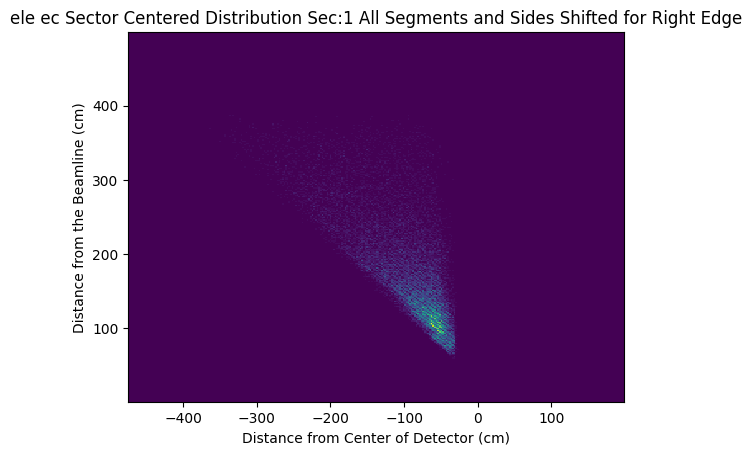

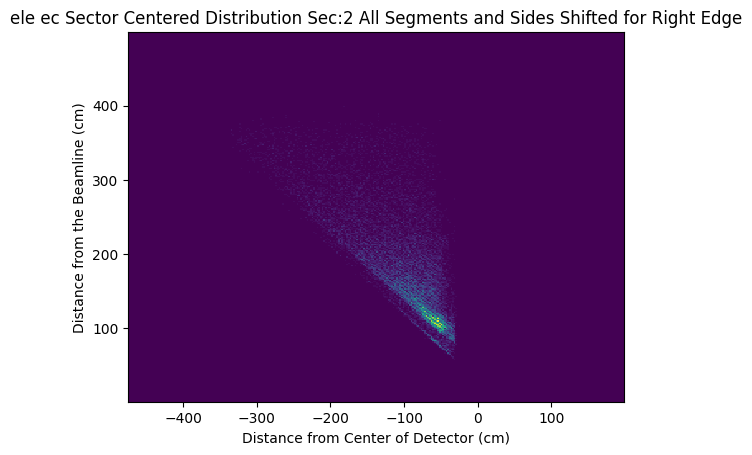

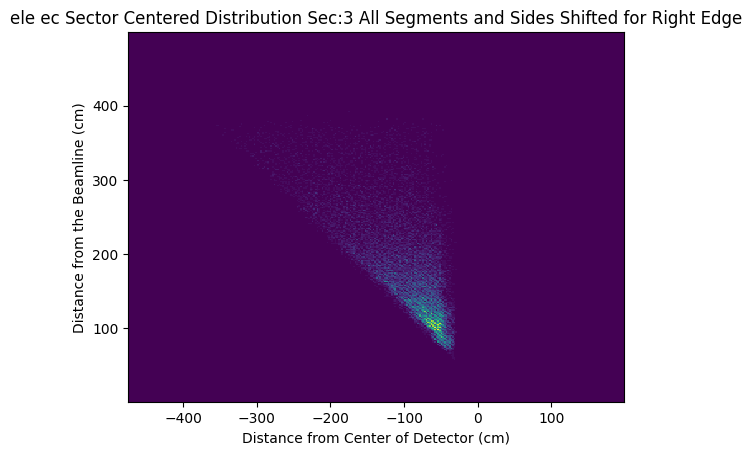

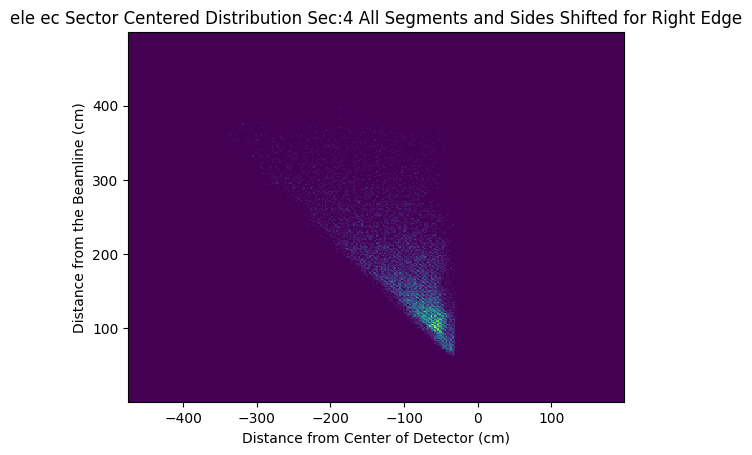

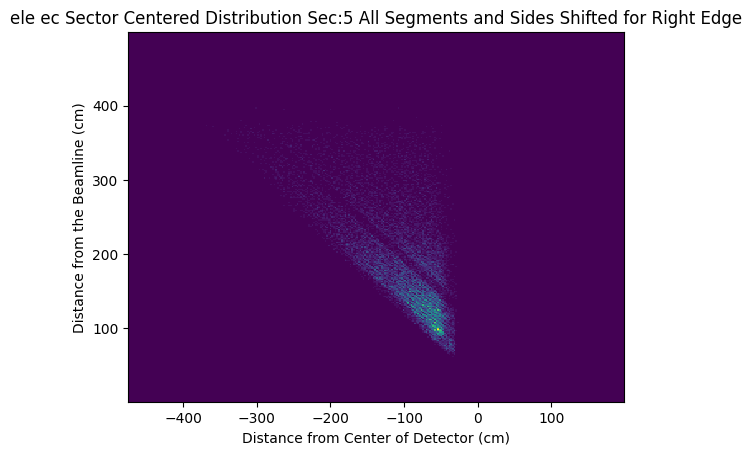

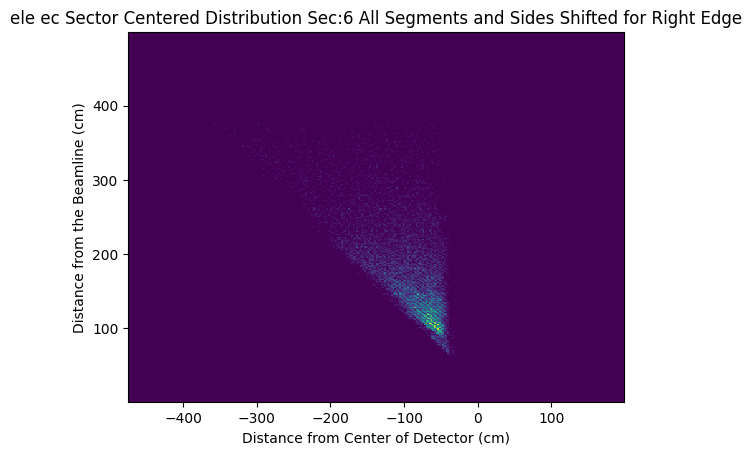

In [12]:
#Shifting for Right Edge
dumb1_x_sr= np.zeros((7,cut_hist_len,xdim*ydim))
dumb1_y_sr= np.zeros((7,cut_hist_len,xdim*ydim))
dense1_sr = np.zeros((7,cut_hist_len,xdim*ydim))
dumb2_x_sr= np.zeros((7,cut_hist_len,xdim*ydim))
dumb2_y_sr= np.zeros((7,cut_hist_len,xdim*ydim))
dense2_sr = np.zeros((7,cut_hist_len,xdim*ydim))
for sec in range(7):
    for i in range(xdim):
        for j in range(ydim):
            for hist_idx in range(cut_hist_len):
                dumb1_x_sr[sec][hist_idx][i+j*xdim]+=xvals[i]-yvals[j]/(right_rot[sec])
                dumb1_y_sr[sec][hist_idx][i+j*xdim]+=yvals[j]
                dense1_sr[sec][hist_idx][i+j*xdim]+=zvals_xy[sec][hist_idx][i][j]
                dumb2_x_sr[sec][hist_idx][j+i*ydim]+=yvals[j]
                dumb2_y_sr[sec][hist_idx][j+i*ydim]+=xvals[i]-yvals[j]/(right_rot[sec])
                dense2_sr[sec][hist_idx][j+i*ydim]+=zvals_yx[sec][hist_idx][j][i]
for sec in range(6):
    plt.hist2d(dumb1_x_sr[sec][cut_hist_len-1], dumb1_y_sr[sec][cut_hist_len-1], bins=(xdim, ydim), weights=dense1_sr[sec][cut_hist_len-1])
    plt.title(species+" "+detector+" Sector Centered Distribution Sec:{} All Segments and Sides Shifted for Right Edge".format(sec+1))
    plt.xlabel("Distance from Center of Detector (cm)")
    plt.ylabel("Distance from the Beamline (cm)")
    plt.show()

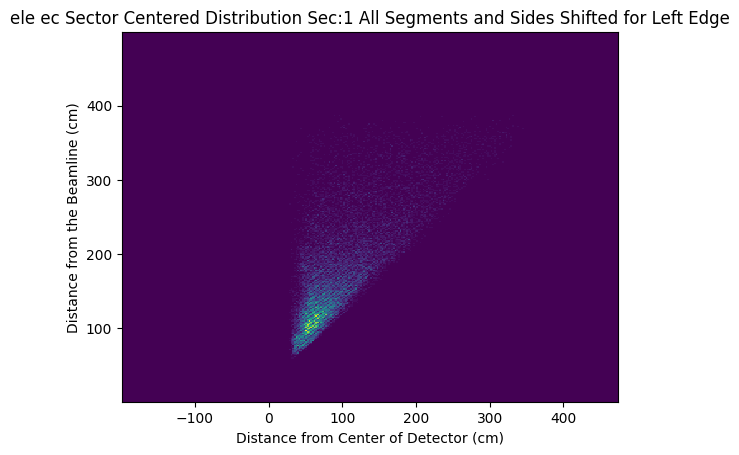

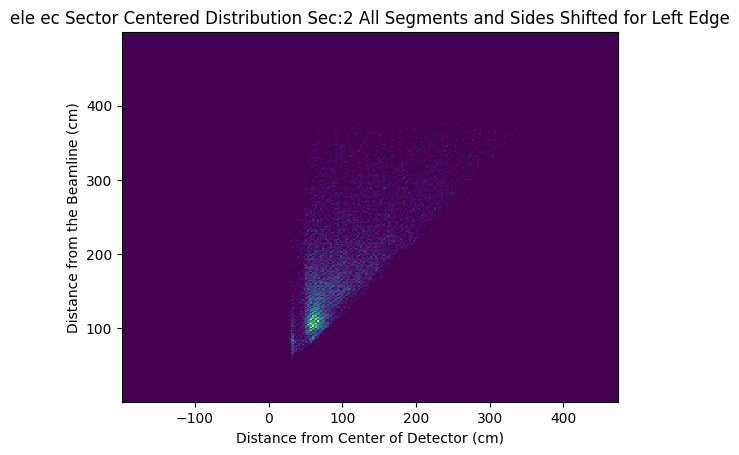

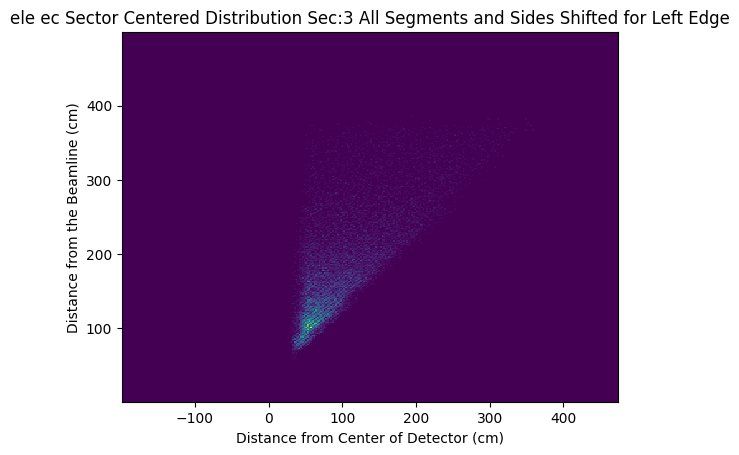

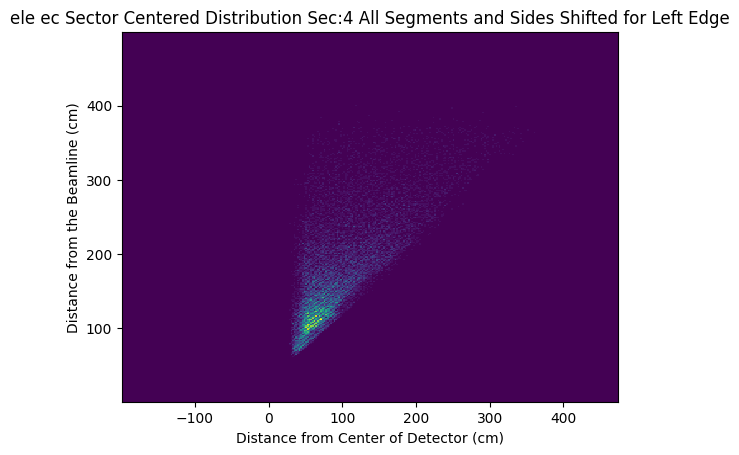

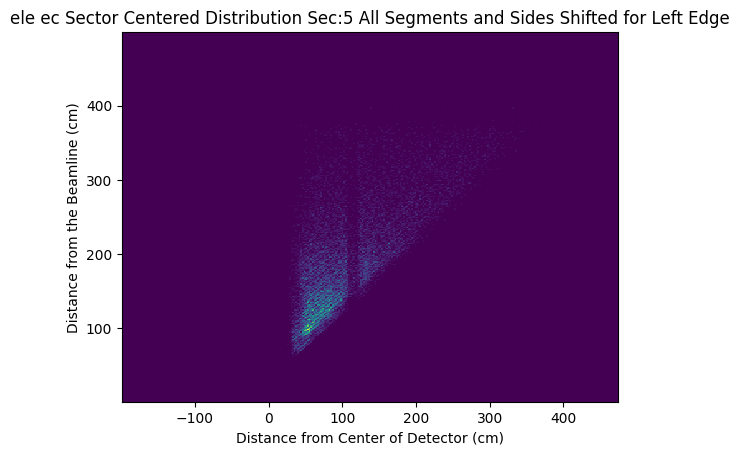

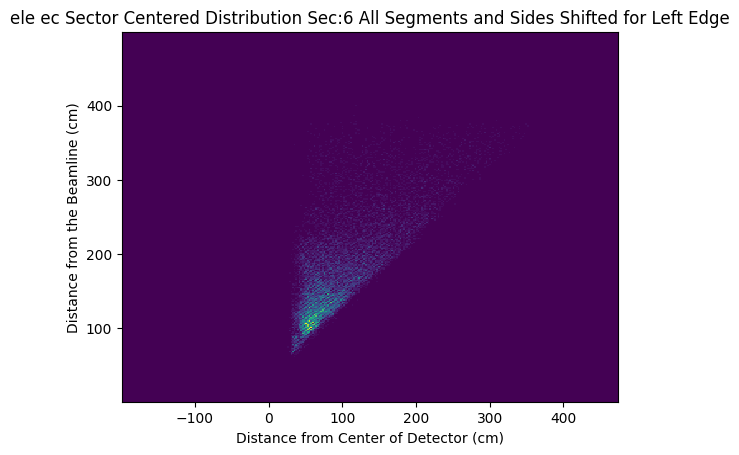

In [13]:
#Shifting for Left Edge
dumb1_x_sl= np.zeros((7,cut_hist_len,xdim*ydim))
dumb1_y_sl= np.zeros((7,cut_hist_len,xdim*ydim))
dense1_sl = np.zeros((7,cut_hist_len,xdim*ydim))
dumb2_x_sl= np.zeros((7,cut_hist_len,xdim*ydim))
dumb2_y_sl= np.zeros((7,cut_hist_len,xdim*ydim))
dense2_sl = np.zeros((7,cut_hist_len,xdim*ydim))
for sec in range(7):
    for i in range(xdim):
        for j in range(ydim):
            for hist_idx in range(cut_hist_len):
                dumb1_x_sl[sec][hist_idx][i+j*xdim]+=xvals[i]-yvals[j]/(left_rot[sec])
                dumb1_y_sl[sec][hist_idx][i+j*xdim]+=yvals[j]
                dense1_sl[sec][hist_idx][i+j*xdim]+=zvals_xy[sec][hist_idx][i][j]
                dumb2_x_sl[sec][hist_idx][j+i*ydim]+=yvals[j]
                dumb2_y_sl[sec][hist_idx][j+i*ydim]+=xvals[i]-yvals[j]/(left_rot[sec])
                dense2_sl[sec][hist_idx][j+i*ydim]+=zvals_yx[sec][hist_idx][j][i]
for sec in range(6):
    plt.hist2d(dumb1_x_sl[sec][cut_hist_len-1], dumb1_y_sl[sec][cut_hist_len-1], bins=(xdim, ydim), weights=dense1_sl[sec][cut_hist_len-1])
    plt.title(species+" "+detector+" Sector Centered Distribution Sec:{} All Segments and Sides Shifted for Left Edge".format(sec+1))
    plt.xlabel("Distance from Center of Detector (cm)")
    plt.ylabel("Distance from the Beamline (cm)")
    plt.show()

In [23]:
proj_y = np.zeros((7,cut_hist_len,ydim))
proj_xr = np.zeros((7,cut_hist_len,xdim))
proj_xl = np.zeros((7,cut_hist_len,xdim))
for sec in range(7):
    for i in range(ydim):
        for j in range(xdim):
            for hist_idx in range(cut_hist_len):
                proj_y[sec][hist_idx][i] += zvals_xy[sec][hist_idx][j][i]
                if j-shift_idx(yvals[i]/(3**(1/2))) > 0:
                    proj_xr[sec][hist_idx][j-shift_idx(yvals[i]/(right_rot[sec]))] += zvals_xy[sec][hist_idx][j][i]
                if j+shift_idx(yvals[i]/(3**(1/2))) < xdim-1:
                    proj_xl[sec][hist_idx][j-shift_idx(yvals[i]/(left_rot[sec]))] += zvals_xy[sec][hist_idx][j][i]

[-7.02778271e+00 -3.87796012e+01  5.36220669e+01  5.19525575e+04]


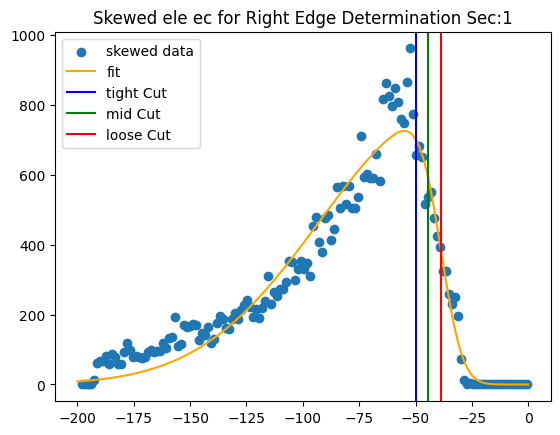

[-7.38044709e+00 -4.02121188e+01  6.31749982e+01  4.93915491e+04]


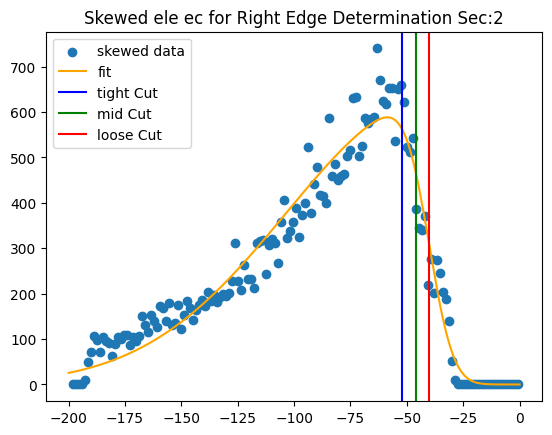

[-8.30180891e+00 -4.14686936e+01  5.43190305e+01  4.92072332e+04]


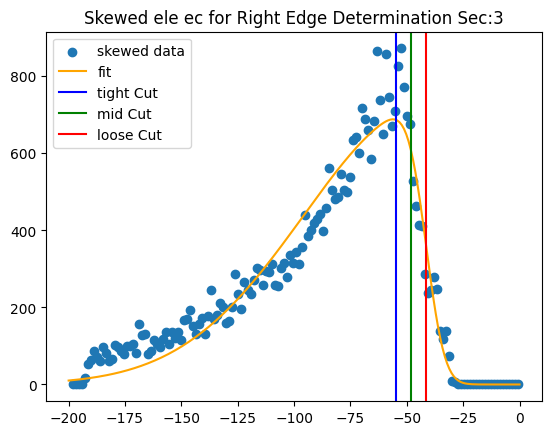

[-6.76530381e+00 -3.98853739e+01  5.45123002e+01  4.79866176e+04]


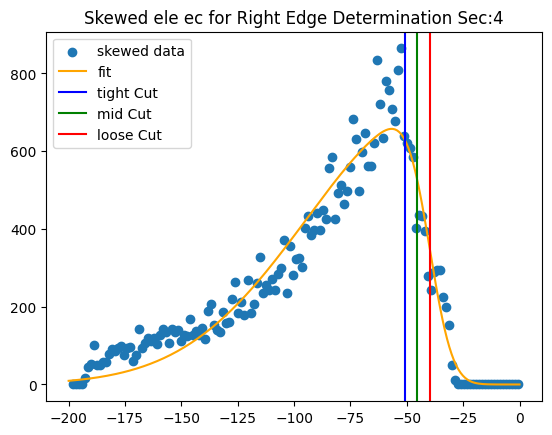

[-8.32844278e+00 -4.24761471e+01  5.88989013e+01  4.43000940e+04]


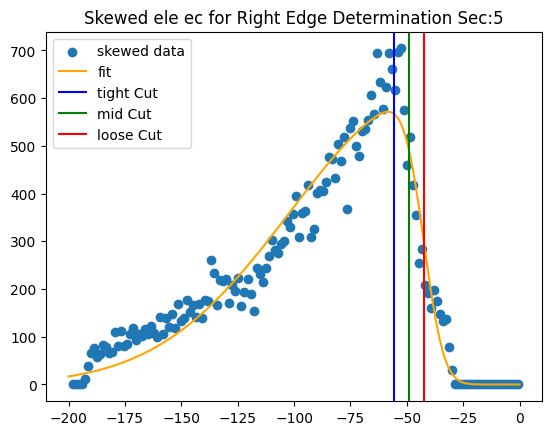

[-1.14149844e+01 -4.48168857e+01  5.15564723e+01  4.58344768e+04]


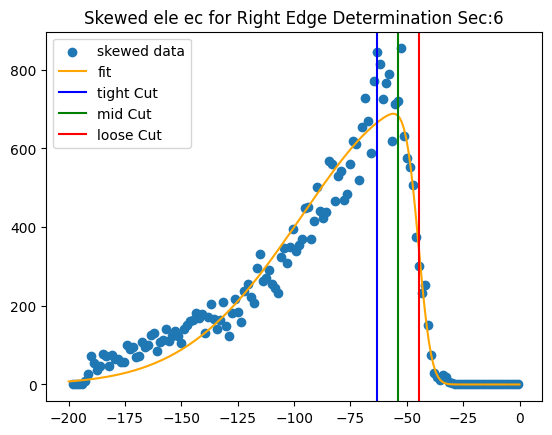

[-7.64026378e+00 -4.40996279e+01  5.78514958e+01  2.88924700e+05]


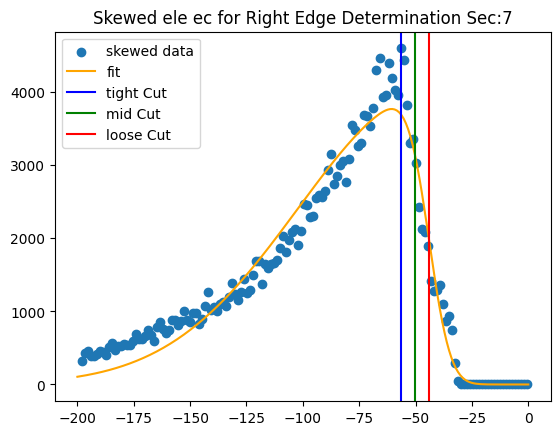

In [24]:
right_edge = np.zeros((7,3))

ini_par = [-6.23,-41,54,51670]

color_order = ['b','g','r']
rv_color_order = ['r','g','b']
cut_name = ['tight','mid','loose']
rv_cut_name = ['loose','mid','tight']

#Bounds_on_Y(yarray_,low_,high_) removes all values not between or equal to bounds
#Bounds_on_X_From_Y(xarray_,yarray_,low_,high_) 

#skew_norm(x_,skew_,loc_,scale_,norm_)
for sec in range(7):
    mod_xvals = Bounds_on_Y(xvals,-198,0.0)
    mod_zvals = Bounds_on_X_From_Y(proj_xr[sec][0],xvals,-198,0.0)
    
    plt.scatter(mod_xvals,mod_zvals,label="skewed data")
    cont_x = np.linspace(-200,0,200)
    #plt.plot(cont_x,skew_norm(cont_x,*ini_par),label="ini_pars")
    try:
        pars, pars_cov = op.curve_fit(skew_norm,mod_xvals,mod_zvals,p0=ini_par,maxfev=5000)
        plt.plot(cont_x,skew_norm(cont_x,*pars),label="fit",color='orange')
        print(pars)
        right_edge[sec][2] = pars[1]
        right_edge[sec][1] = pars[1]+0.8*pars[0]
        right_edge[sec][0] = pars[1]+1.6*pars[0]
    except RuntimeError:
        print("Runtime Error")
    except ValueError:
        print("Value Error")
    for cut in range(3):
        plt.axvline(x=right_edge[sec][cut],label="{} Cut".format(cut_name[cut]),color=color_order[cut])
    plt.title("Skewed "+species+" "+detector+" for Right Edge Determination Sec:{}".format(sec+1))
    plt.legend()
    plt.show()

[6.77589754e+00 4.06456137e+01 5.09109307e+01 5.16311136e+04]


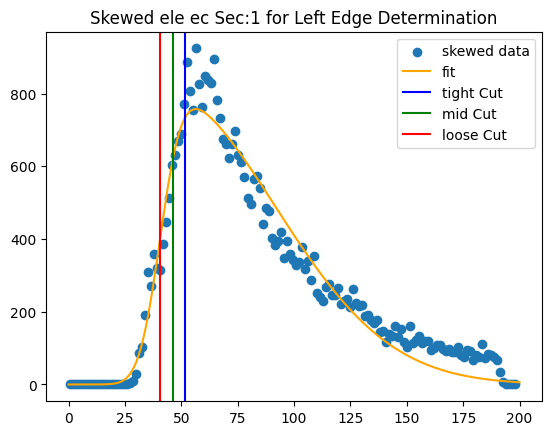

[1.07906072e+01 4.97876158e+01 3.97746355e+01 4.27388880e+04]


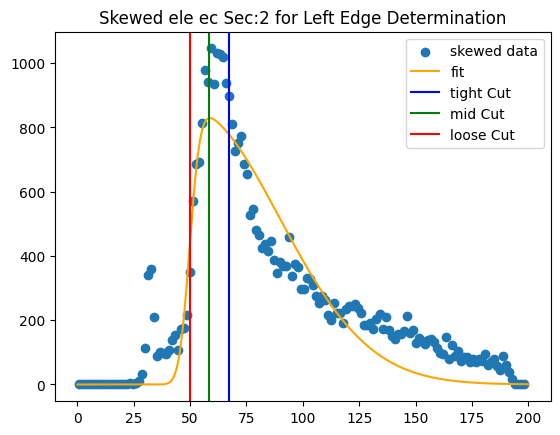

[9.61611311e+00 4.12263579e+01 5.28025364e+01 4.87399808e+04]


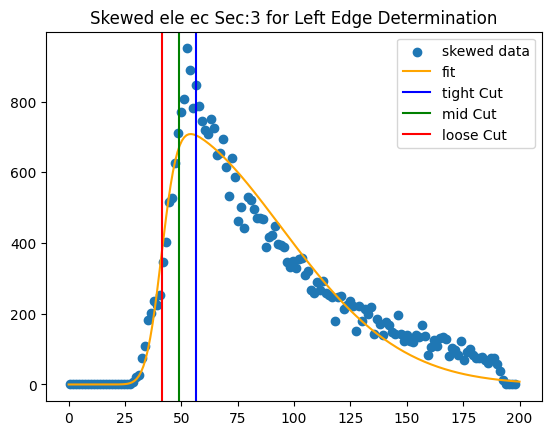

[7.94494499e+00 4.06814201e+01 5.09049030e+01 4.75196808e+04]


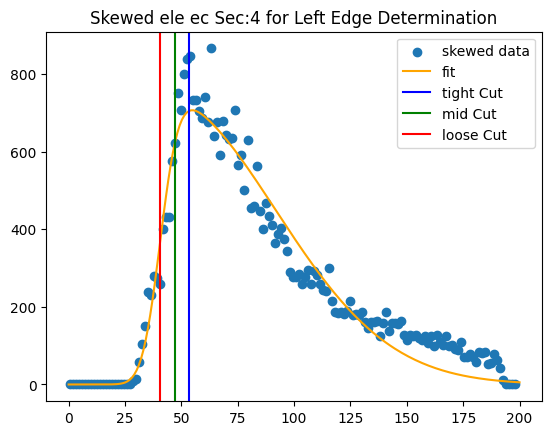

[7.60464058e+00 4.15987708e+01 5.30171397e+01 4.25550318e+04]


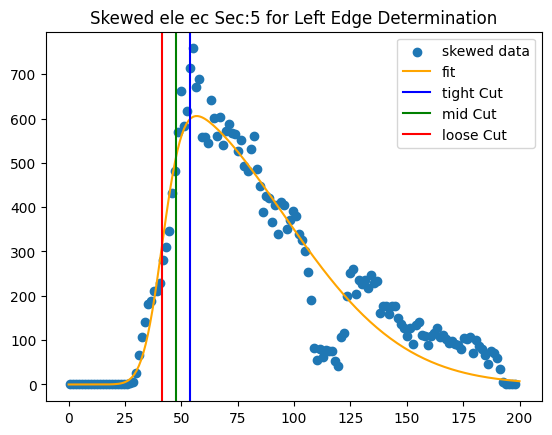

[8.19684984e+00 4.11188892e+01 5.29746513e+01 4.47875458e+04]


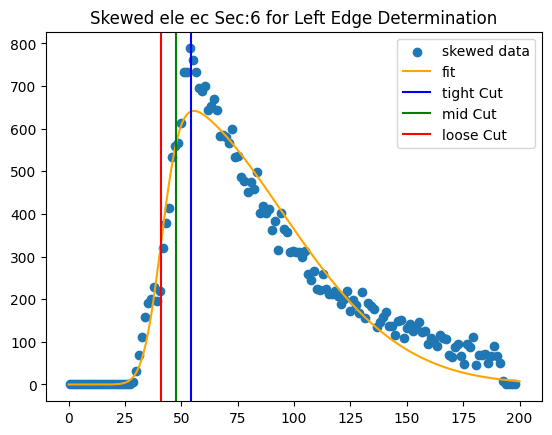

[3.61575017e+02 2.46736184e+02 2.94374465e+04 4.57868777e+07]


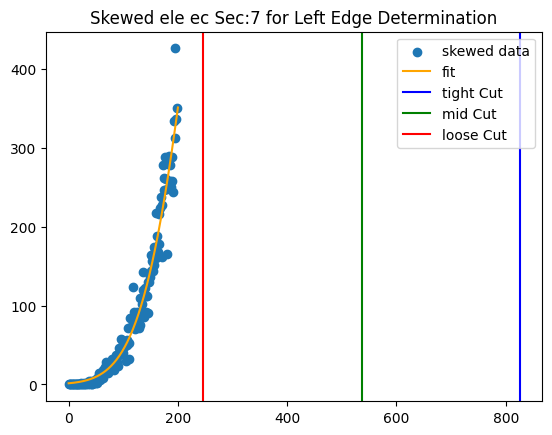

In [63]:
left_edge = np.zeros((7,3))

ini_par = [6.23,41,54,51670]


for sec in range(7):
    mod_xvals = Bounds_on_Y(xvals,0.0,198)
    mod_zvals = Bounds_on_X_From_Y(proj_xl[sec][0],xvals,0.0,198)
    
    plt.scatter(mod_xvals,mod_zvals,label="skewed data")
    cont_x = np.linspace(0.0,200,200)
    #plt.plot(cont_x,skew_norm(cont_x,*ini_par),label="ini_pars")
    try:
        pars, pars_cov = op.curve_fit(skew_norm,mod_xvals,mod_zvals,p0=ini_par,maxfev=5000)
        plt.plot(cont_x,skew_norm(cont_x,*pars),label="fit",color='orange')
        print(pars)
        left_edge[sec][2] = pars[1]
        left_edge[sec][1] = pars[1]+0.8*pars[0]
        left_edge[sec][0] = pars[1]+1.6*pars[0]
    except RuntimeError:
        print("Runtime Error")
    except ValueError:
        print("Value Error")
    for cut in range(3):
        plt.axvline(x=left_edge[sec][cut],label="{} Cut".format(cut_name[cut]),color=color_order[cut])
    plt.title("Skewed "+species+" "+detector+" Sec:{} for Left Edge Determination".format(sec+1))
    plt.legend()
    plt.show()

In [73]:
def exp_off(x_, a_, mu_,d_):
    return a_*np.exp(-(x_-mu_)/d_)

def exp_off_edge(comp_,frac_, a_, mu_, d_):
    return -d_*(math.log(frac_)-((comp_-mu_)/d_)-(mu_/d_))

[4401.48799887  299.10648813   12.67661937]


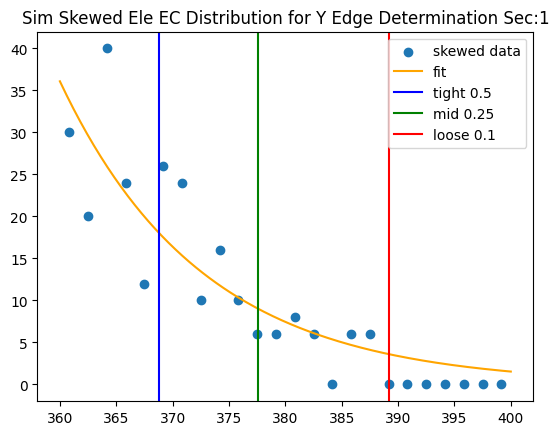

[5089.82894396  307.2861746    11.45564349]


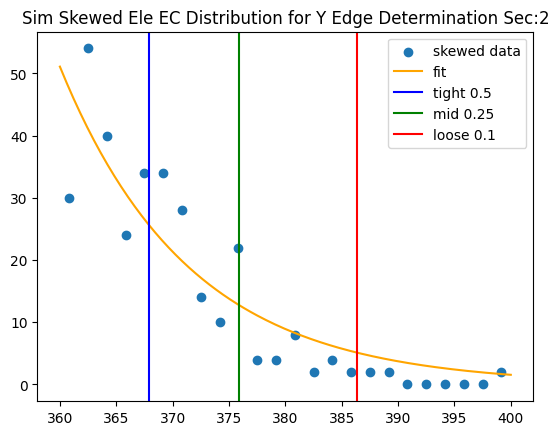

[4850.63558748  314.01754548   10.57057011]


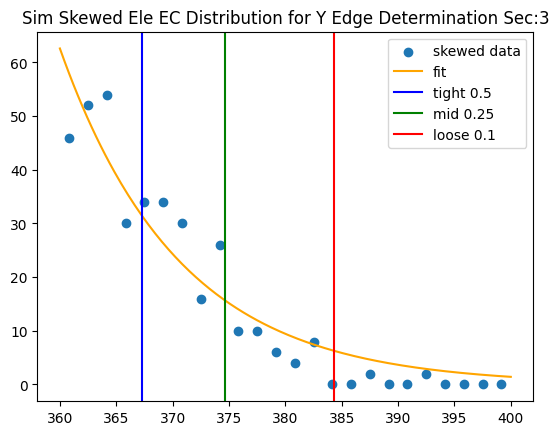

[4550.68651482  304.1481526    11.79895691]


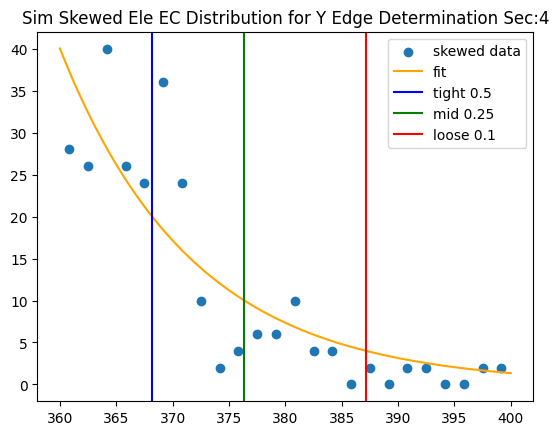

[5034.03256155  319.84273727    9.07013509]


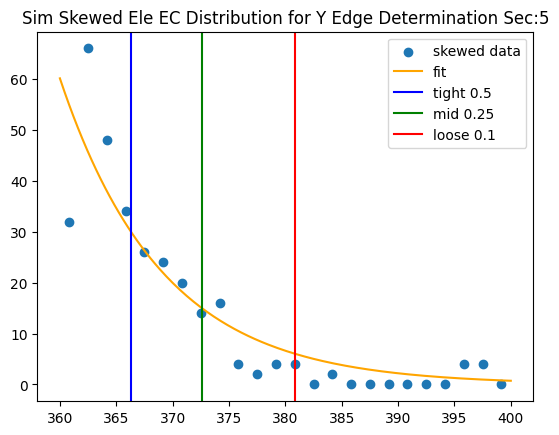

[1042.96344267  317.87184717   12.27003329]


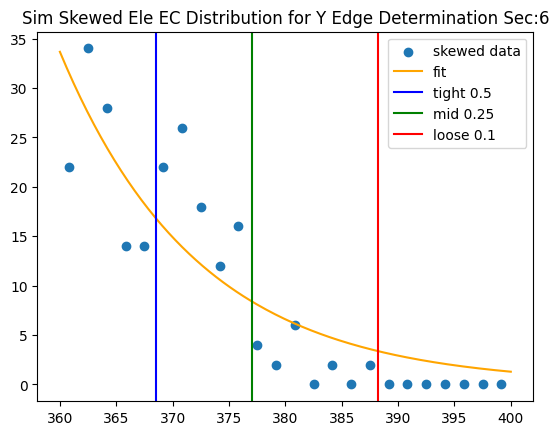

[1.11936603e+04 3.19294924e+02 1.10624579e+01]


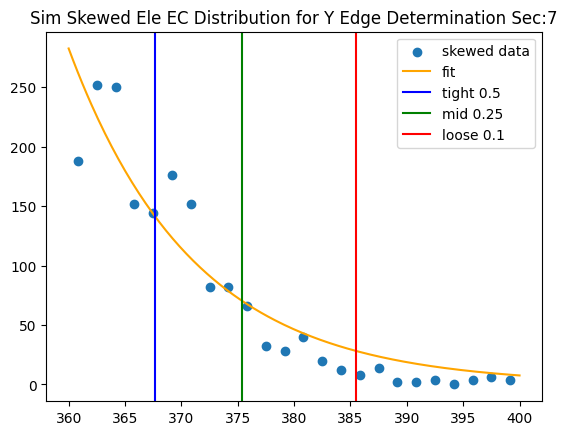

In [77]:
y_edge = np.zeros((7,3))

ini_par = [1359.29693959,  184.29431595,   43.19563841]

bou_y = [360.0,400.0]

comp_x = 360.0

frac_y = [0.5,0.25,0.1]

for sec in range(7):
    mod_xvals = Bounds_on_Y(yvals,bou_y[0],bou_y[1])
    mod_zvals = Bounds_on_X_From_Y(proj_y[sec][0],yvals,bou_y[0],bou_y[1])
    
    plt.scatter(mod_xvals,mod_zvals,label="skewed data")
    cont_x = np.linspace(bou_y[0],bou_y[1],200)
    #plt.plot(cont_x,skew_norm(cont_x,*ini_par),label="ini_pars")
    try:
        pars, pars_cov = op.curve_fit(exp_off,mod_xvals,mod_zvals,p0=ini_par,maxfev=5000)
        plt.plot(cont_x,exp_off(cont_x,*pars),label="fit",color='orange')
        print(pars)
        for cut in range(3):
            y_edge[sec][cut] = exp_off_edge(comp_x,frac_y[cut],*pars)
    except RuntimeError:
        print("Runtime Error")
    except ValueError:
        print("Value Error")
    for cut in range(3):
        plt.axvline(x=y_edge[sec][cut],label="{} {}".format(cut_name[cut],frac_y[cut]),color=color_order[cut])
    plt.title("Sim Skewed Ele EC Distribution for Y Edge Determination Sec:{}".format(sec+1))
    plt.legend()
    plt.show()

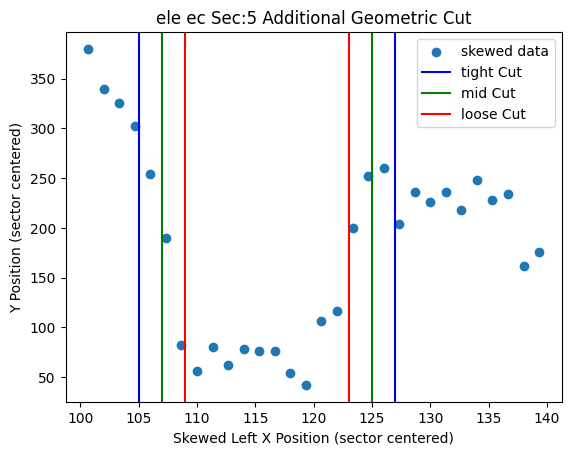

1.8115942028985508 1.7320508075688772


In [38]:
#Additional Cut on Sector 5 Needed
#manually adjusted
vert_cuts = [[105,127],[107,125],[109,123]]
sec = 4
bou = [100,140]
mod_xvals = Bounds_on_Y(xvals,bou[0],bou[1])
mod_zvals = Bounds_on_X_From_Y(proj_xl[sec][0],xvals,bou[0],bou[1])
plt.scatter(mod_xvals,mod_zvals,label="skewed data")
for cut in range(3):
    plt.axvline(x=vert_cuts[cut][0],color=color_order[cut],label="{} Cut".format(cut_name[cut]))
    plt.axvline(x=vert_cuts[cut][1],color=color_order[cut])
plt.title(species+" "+detector+" Sec:{} Additional Geometric Cut".format(sec+1))
plt.xlabel("Skewed Left X Position (sector centered)")
plt.ylabel("Y Position (sector centered)")
plt.legend()
plt.show()


print(right_rot[sec],(3**(1/2)))
sec_5_cuts = [[[vert_cuts[cut][0]*(-left_rot[sec]),left_rot[sec]],[vert_cuts[cut][1]*(-left_rot[sec]),left_rot[sec]]] for cut in range(3)]




In [35]:
def super_gaus_cut_bound(frac_,side_,a_,m_,s_,p_):
    if side_ == 0:
        return 0.5*(2*m_ - 2 * (math.log(1./frac_)**(1./p_))*(2**(p_/2.)*(1./s_)**(-p_))**(1./p_))
    elif side_ ==1:
        return 0.5*(2*m_ + 2 * (math.log(1./frac_)**(1./p_))*(2**(p_/2.)*(1./s_)**(-p_))**(1./p_))
    else:
        return -99.9
    

def Sup_Gaus_Cutoff(x_,frac_,a_,m_,s_,p_):
    if x < super_gaus_cut_bound(frac_,0,a_,m_,s_,p_):
        return 0.
    elif x > super_gaus_cut_bound(frac_,1,a_,m_,s_,p_):
        return 0.
    else:
        return Super_Gaus(x_,a_,m_,s_,p_)
    
def Sup_Gaus_Cutoff_Array(x_,frac_,a_,m_,s_,p_):
    output = np.zeros(len(x_))
    for i in range(len(x_)):
        output[i] = Sup_Gaus_Cutoff(x_[i],frac_,a_,m_,s_,p_)
    return output

[[[90.62328539759662, 1.8115942028985508], [80.4380930663913, 1.8115942028985508], [70.252900735186, 1.8115942028985508]], [[94.24064160938177, 1.8115942028985508], [83.54434147468957, 1.8115942028985508], [72.84804133999738, 1.8115942028985508]], [[99.18765921527515, 1.8115942028985508], [87.15605210324755, 1.8115942028985508], [75.12444499121995, 1.8115942028985508]], [[91.86568836315423, 1.8115942028985508], [82.06090023038895, 1.8115942028985508], [72.25611209762366, 1.8115942028985508]], [[101.08995571105137, 1.8115942028985508], [89.0197487772841, 1.8115942028985508], [76.94954184351683, 1.8115942028985508]], [[114.27692147816958, 1.8115942028985508], [97.73346589805874, 1.8115942028985508], [81.19001031794788, 1.8115942028985508]], [[97.55611615902677, 1.7320508075688772], [86.9694561223865, 1.7320508075688772], [76.38279608574621, 1.7320508075688772]]]
[[90.62328539759662, 1.8115942028985508], [80.4380930663913, 1.8115942028985508], [70.252900735186, 1.8115942028985508]]


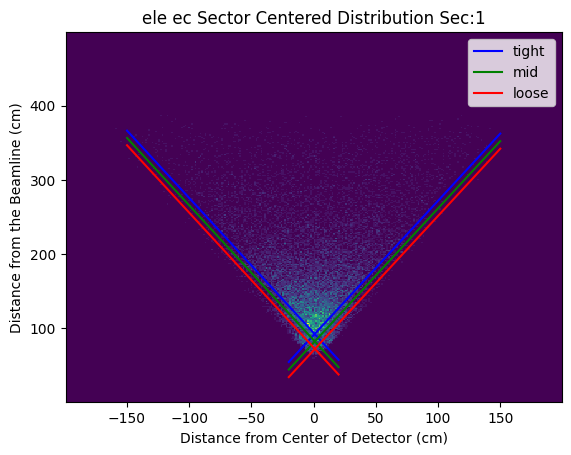

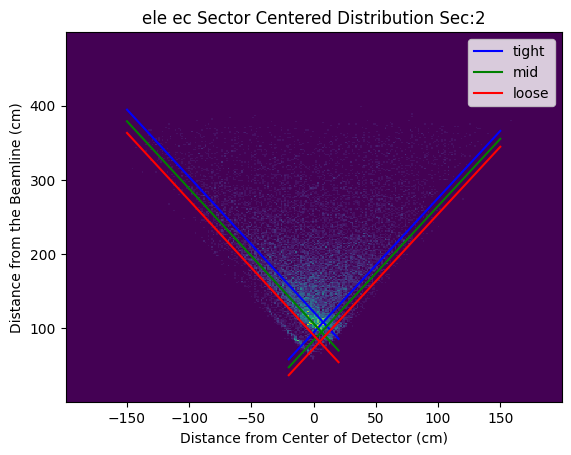

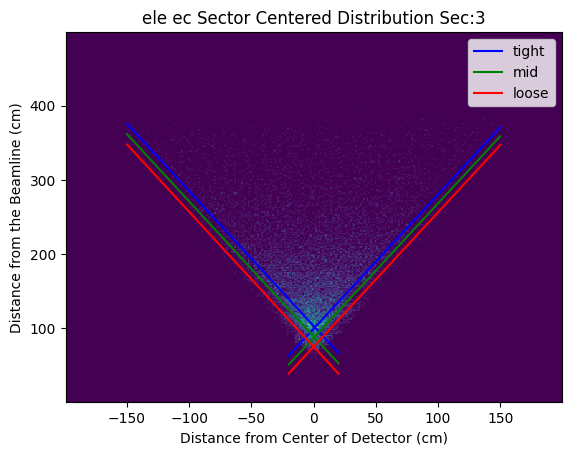

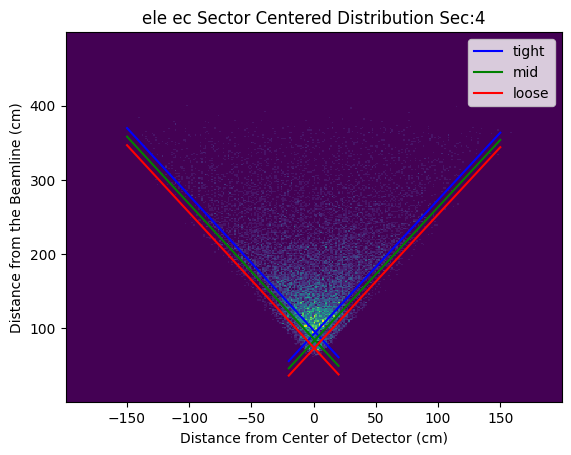

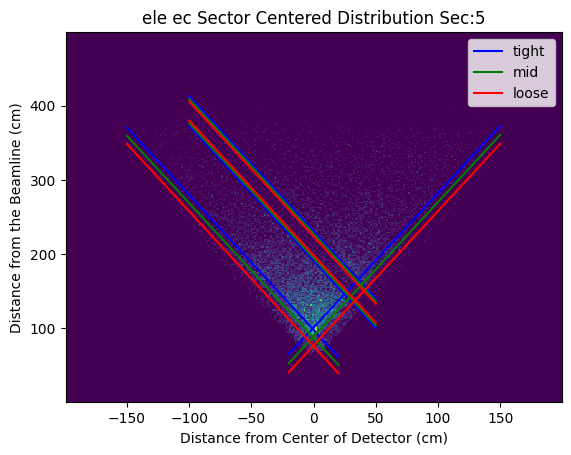

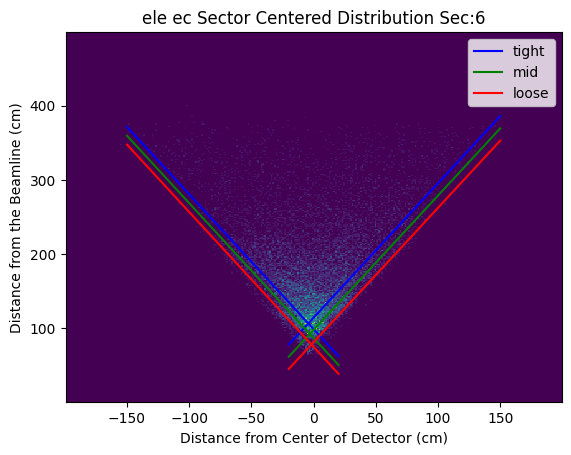

In [81]:
right_cut_pars = [[[-right_edge[i][cut]*right_rot[i],right_rot[i]] for cut in range(3)] for i in range(7)]
left_cut_pars = [[[left_edge[i][cut]*(-1*left_rot[i]),left_rot[i]] for cut in range(3)] for i in range(7)]

print(right_cut_pars)
print(right_cut_pars[0])

cont_x_r = np.linspace(-20.0,150.,200)
cont_x_l = np.linspace(-150.0,20.,200)
cont_x_l2 = np.linspace(-100.0,50.,200)

for sec in range(6):
    plt.hist2d(dumb1_x[sec][cut_hist_len-1], dumb1_y[sec][cut_hist_len-1], bins=(xdim, ydim), weights=dense1[sec][cut_hist_len-1])
    for cut in range(3):
        plt.plot(cont_x_r,Poly(cont_x_r,right_cut_pars[sec][cut]),label=cut_name[cut],color=color_order[cut])
        plt.plot(cont_x_l,Poly(cont_x_l,left_cut_pars[sec][cut]),color=color_order[cut])
        if sec == 4:
            plt.plot(cont_x_l2,Poly(cont_x_l2,sec_5_cuts[cut][0]),color=color_order[cut])
            plt.plot(cont_x_l2,Poly(cont_x_l2,sec_5_cuts[cut][1]),color=color_order[cut])
    plt.title(species+" "+detector+" Sector Centered Distribution Sec:{}".format(sec+1))
    plt.xlabel("Distance from Center of Detector (cm)")
    plt.ylabel("Distance from the Beamline (cm)")
    plt.legend()
    plt.show()

In [45]:
print("Cut Parameters for "+species+" "+detector+" Geometric Cut")
print("side_cut_par[sec][{tight,mid,loose}][right,left][intercept,slope]")

for sec in range(6):
    for cut in range(3):
        if cut == 0:
            if sec ==0:
                print("{\t{\t{\t{",right_cut_pars[sec][cut][0],",",right_cut_pars[sec][cut][1],"},{",left_cut_pars[sec][cut][0],",",left_cut_pars[sec][cut][1],"}},")
            else:
                print("\t{\t{\t{",right_cut_pars[sec][cut][0],",",right_cut_pars[sec][cut][1],"},{",left_cut_pars[sec][cut][0],",",left_cut_pars[sec][cut][1],"}},")
        elif cut==2:
            if sec == 5:
                 print("\t\t{\t{",right_cut_pars[sec][cut][0],",",right_cut_pars[sec][cut][1],"},{",left_cut_pars[sec][cut][0],",",left_cut_pars[sec][cut][1],"}}}}")
            else:
                print("\t\t{\t{",right_cut_pars[sec][cut][0],",",right_cut_pars[sec][cut][1],"},{",left_cut_pars[sec][cut][0],",",left_cut_pars[sec][cut][1],"}}},")
        else:
            print("\t\t{\t{",right_cut_pars[sec][cut][0],",",right_cut_pars[sec][cut][1],"},{",left_cut_pars[sec][cut][0],",",left_cut_pars[sec][cut][1],"}},")

        
        

Cut Parameters for ele ec Geometric Cut
side_cut_par[sec][{tight,mid,loose}][right,left][intercept,slope]
{	{	{	{ 90.62328539759662 , 1.8115942028985508 },{ 93.61281772483015 , -1.8181818181818181 }},
		{	{ 80.4380930663913 , 1.8115942028985508 },{ 83.7569667634192 , -1.8181818181818181 }},
		{	{ 70.252900735186 , 1.8115942028985508 },{ 73.90111580200825 , -1.8181818181818181 }}},
	{	{	{ 94.24064160938177 , 1.8115942028985508 },{ 121.91379517013755 , -1.8181818181818181 }},
		{	{ 83.54434147468957 , 1.8115942028985508 },{ 106.21836651434144 , -1.8181818181818181 }},
		{	{ 72.84804133999738 , 1.8115942028985508 },{ 90.52293785854533 , -1.8181818181818181 }}},
	{	{	{ 99.18765921527515 , 1.8115942028985508 },{ 102.93116154926742 , -1.8181818181818181 }},
		{	{ 87.15605210324755 , 1.8115942028985508 },{ 88.94408792787523 , -1.8181818181818181 }},
		{	{ 75.12444499121995 , 1.8115942028985508 },{ 74.95701430648305 , -1.8181818181818181 }}},
	{	{	{ 91.86568836315423 , 1.8115942028985508 },{ 9

In [49]:
print("Sector 5 efficiency cut")
print("[tight,mid,loose][bot,top][intercept,slope]")
for cut in range(3):
    if cut==0:
        print("{\t{\t{",sec_5_cuts[cut][0][0],",",sec_5_cuts[cut][0][1],"},{",sec_5_cuts[cut][1][0],",",sec_5_cuts[cut][1][1],"}},")

    elif cut==2:
        print("\t{\t{",sec_5_cuts[cut][0][0],",",sec_5_cuts[cut][0][1],"},{",sec_5_cuts[cut][1][0],",",sec_5_cuts[cut][1][1],"}}}")
    else:
        print("\t{\t{",sec_5_cuts[cut][0][0],",",sec_5_cuts[cut][0][1],"},{",sec_5_cuts[cut][1][0],",",sec_5_cuts[cut][1][1],"}},")
    
    

Sector 5 efficiency cut
[tight,mid,loose][bot,top][intercept,slope]
{	{	{ 190.9090909090909 , -1.8181818181818181 },{ 230.9090909090909 , -1.8181818181818181 }},
	{	{ 194.54545454545453 , -1.8181818181818181 },{ 227.27272727272725 , -1.8181818181818181 }},
	{	{ 198.1818181818182 , -1.8181818181818181 },{ 223.63636363636363 , -1.8181818181818181 }}}


In [80]:
print("Top EC Geo cut")
print("[sec][tight,mid,loose]")
for sec in range(6):
    if sec == 0:
        print("{\t{",y_edge[sec][0],",",y_edge[sec][1],",",y_edge[sec][2],"},")
    elif sec==5:
        print("\t{",y_edge[sec][0],",",y_edge[sec][1],",",y_edge[sec][2],"}}")
    else:
        print("\t{",y_edge[sec][0],",",y_edge[sec][1],",",y_edge[sec][2],"},")
    
                                                                                  

Top EC Geo cut
[sec][tight,mid,loose]
{	{ 368.78676297271363 , 377.5735259454273 , 389.1889947821735 },
	{ 367.94044698790856 , 375.8808939758171 , 386.3775939350972 },
	{ 367.3269608707014 , 374.6539217414027 , 384.33963716652323 },
	{ 368.17841371733476 , 376.3568274346696 , 387.16810229922663 },
	{ 366.2869385631504 , 372.5738771263007 , 380.88475784376 },
	{ 368.5049389809359 , 377.0098779618718 , 388.2527957460736 }}
